# Chapter 11: Evolutionary Algorithms

## 11.1 Introduction

## 11.2 Bottleneck with Traditional Methods

- Problem: linear search in greeda manner $\Rightarrow$ local optimum


## 11.3 Darwin's Theory of Evolution

- creating an initial population of samples 
- mutation-based sample variation, natural selection
- find sample which evolves into better estimate
$\Rightarrow$ Higher chance in finding a global optimum


## 11.4 Genetic programming

Steps
1. Set process parameters (stopping criteria, mutation fraction)
2. Initialize population using random selection
3. Create fitness index
4. Apply index to population and eliminate low-scoring candidates
5. Randomly select pairs of candidates $\rightarrow$ Reproduction
   1) Crossover
   2) Mutation
6. Augment original population with newly created offsprings
7. Repeat till desired stopping criteria are met


### 11.4.1 Implementing Genetic Programming

- library *gplearn*
- muli-class classification is not supported


In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from gplearn import genetic

gc = genetic.SymbolicClassifier()
gc.fit(X=X[1:100], y=y[1:100])
y_pred = gc.predict(X[1:100])
gc.score(X=X[1:100], y=y[1:100])

1.0

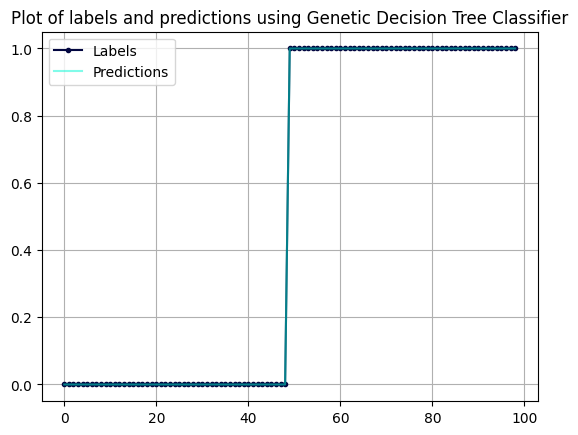

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title('Plot of labels and predictions using Genetic Decision Tree Classifier')
ax1.plot(y[1:100], color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

## 11.5 Swarm Intelligence

1. Initialize system by introducing a suitable environment by defining constraints
2. Initialize individual organism
3. Establish number of organisms and period of evolution
4. Define individual and group goals as well as stopping criteria
5. Define randomness factor
6. Repeat until finish criteria are met


## 11.6 Ant colony optimization

- based on behavior of a large group of ants in a colony
- no central decision maker


## 11.7 Simulated Annealing

- origins in metallurgy
- finding the global maximum/minimum in a solution space that contains multiple local maxima/minima

In [5]:
from sklearn.multiclass import OneVsRestClassifier
gc = OneVsRestClassifier(genetic.SymbolicClassifier()).fit(X, y)
y_pred = gc.predict(X)
gc.score(X, y)


0.9733333333333334

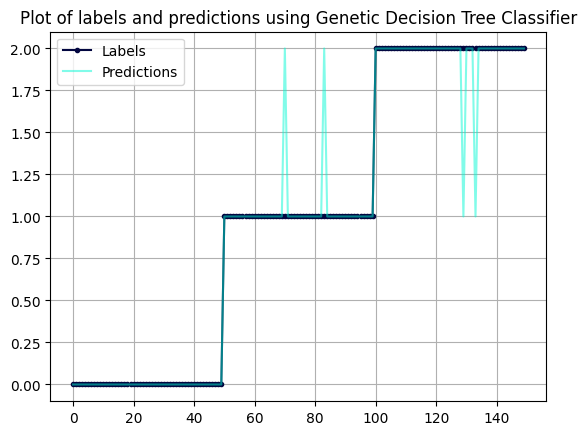

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title('Plot of labels and predictions using Genetic Decision Tree Classifier')
ax1.plot(y, color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

In [7]:
gc = OneVsRestClassifier(genetic.SymbolicClassifier(generations=30)).fit(X, y)
y_pred = gc.predict(X)
gc.score(X, y)

0.9866666666666667

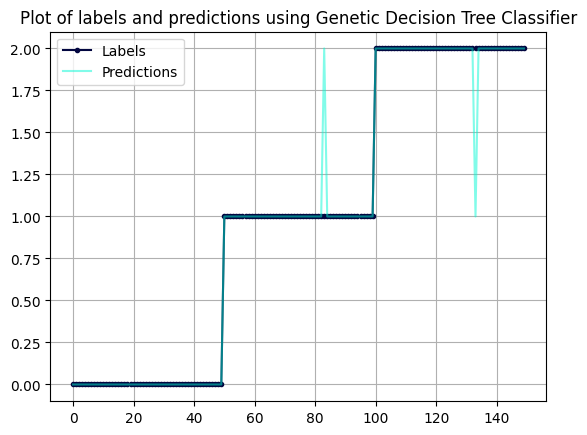

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title('Plot of labels and predictions using Genetic Decision Tree Classifier')
ax1.plot(y, color = "#020640", marker = ".", label = "Labels")
ax1.plot(y_pred, color = "#05f9d4", label = "Predictions", alpha = .5)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

In [9]:
gc = OneVsRestClassifier(genetic.SymbolicClassifier(generations=10)).fit(X, y)
y_pred = gc.predict(X)
gc.score(X, y)

0.98

**PySwarm library**

2024-03-13 09:59:29,874 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=4.61e-42
2024-03-13 09:59:30,396 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.605349939256104e-42, best pos: [-6.94444974e-22  2.03054084e-21]


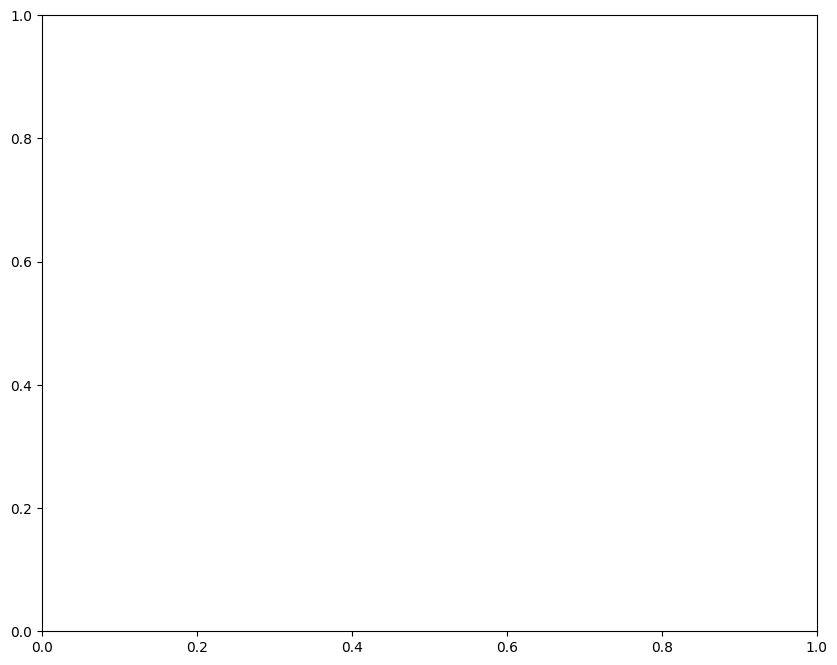

In [12]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import matplotlib.pyplot as plt
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.plotters import plot_contour, plot_surface

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

m = Mesher(func=fx.sphere)
pos_history_3d = m.compute_history_3d(optimizer.pos_history)
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
animation3d = plot_surface(pos_history=pos_history_3d, # The cost_history that we computed
                           mesher=m, designer=d,       
                           mark=(0,0,0))               # Mark the minimum value for function.

plt.show()